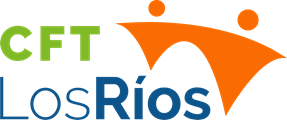

## UNIDAD IV: ESTADISTICA INFERENCIAL
#### PROFESOR: DIEGO MIRANDA
#### DATA SCIENTIST

### Modelo de regresion lineal simple con datos simulados

* y = a + b * x
* x = 100 valores distribuidos segun una N(1.5, 2.5) (media, std)
* Ye = 2 + 2.0 * x + e
* e = estara disribuida segun una N(0 , 0.8)

In [1]:
import pandas as pd
import numpy as np

x = 1.5 + 2.5 * np.random.randn(100)
error = 0 + 0.8 * np.random.randn(100)
y_pred = 2 + 2.0 * x # esto es lo que nos devuelve el modelo lineal
y_actual = 2 + 2.0 * x + error


x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_actual_list = y_actual.tolist()

In [2]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_actual_list,
        "y_prediccion":y_pred_list       
    }
)

data.head()

,x,y_actual,y_prediccion
0,6.094247,13.803491,14.188494
1,4.836493,10.941925,11.672986
2,-1.264943,-0.062772,-0.529886
3,5.082449,12.281052,12.164899
4,3.074200,7.350605,8.148400


In [3]:
y_mean = [np.mean(y_actual)] * len(x_list)

Text(0.5, 1.0, 'Valor Actual vs Prediccion')

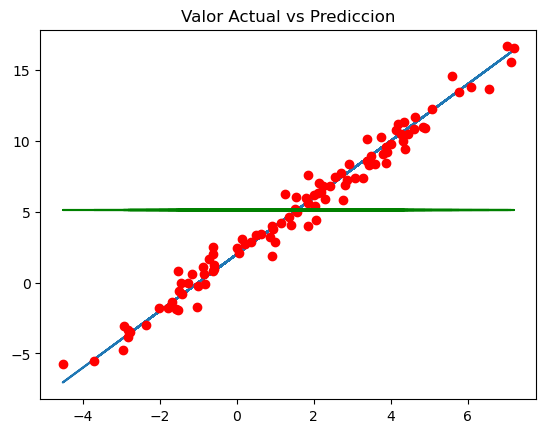

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x,y_actual, "ro")
plt.plot(x, y_mean, "g")
plt.title("Valor Actual vs Prediccion")

* SUMA DE LOS CUADRADOS DE LAS DIFERENCIAS (SSD) = DISTANCIA ENTRE LOS VALORES ACTUALES Y LAS PREDICCIONES.
* SUMA DE LOS CUADRADOS TOTALES (SST) = DISTANCIA ENTRE LOS VALORES ACTUALES Y LA MEDIANA O IGUAL SE PUEDE REPRESENTAR CON EL PROMEDIO.
* SUMA DE LOS CUADRADOS DE LA REGRESION (SSR) = DISTANCIA ENTRE LAS PREDICCIONES Y LA MEDIANA O IGUAL SE PUEDE REPRESENTAR CON EL PROMEDIO
* SST = SSR + SSD
* R2 = SSR/SST

In [5]:
y_m = np.mean(y_actual)
data["SSR"] = (data["y_prediccion"]-y_m)**2
data["SSD"] = (data["y_prediccion"]-data["y_actual"])**2
data["SST"] = (data["y_actual"]-y_m)**2

In [6]:
data.head(10)

,x,y_actual,y_prediccion,SSR,SSD,SST
0,6.094247,13.803491,14.188494,82.589335,0.148227,75.739854
1,4.836493,10.941925,11.672986,43.195913,0.534451,34.120767
2,-1.264943,-0.062772,-0.529886,31.702669,0.218195,26.660690
3,5.082449,12.281052,12.164899,49.903939,0.013491,51.558500
4,3.074200,7.350605,8.148400,9.288920,0.636476,5.062403
5,1.256155,6.220994,4.512310,0.346117,2.919602,1.255223
6,3.899161,9.188412,9.798322,22.068343,0.371991,16.709986
7,-0.824310,-0.132098,0.351380,22.555349,0.233750,27.381404
8,-0.004725,2.440147,1.990551,9.672571,0.202136,7.078154
9,-1.041786,-1.700099,-0.083572,26.875915,2.613160,46.249870


In [7]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [8]:
print("La suma de los cuadrados de la regresion es: ", SSR)
print("La suma de los cuadrados de las diferencias es: ", SSD)
print("La suma de los cuadrados totales: ", SST)

La suma de los cuadrados de la regresion es:  2813.7226393337965
La suma de los cuadrados de las diferencias es:  64.80024131741311
La suma de los cuadrados totales:  2693.0348003230765


In [9]:
R2 = SSR/SST
R2

1.0448148085558497

(array([ 4.,  5.,  9., 10., 23., 19., 15.,  6.,  4.,  5.]),
 array([-1.90469272, -1.52013873, -1.13558475, -0.75103076, -0.36647677,
         0.01807722,  0.40263121,  0.78718519,  1.17173918,  1.55629317,
         1.94084716]),
 <BarContainer object of 10 artists>)

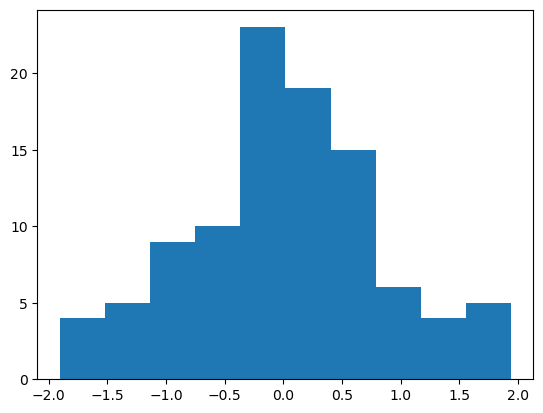

In [10]:
plt.hist(data["y_prediccion"]-data["y_actual"])

In [11]:
x_pred = 3.0  
y_pred = 2 + 2.0 * x_pred  

print("Predicción de y para x =", x_pred, "es", y_pred)

Predicción de y para x = 3.0 es 8.0


In [12]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,6.094247,13.803491,14.188494,82.589335,0.148227,75.739854
1,4.836493,10.941925,11.672986,43.195913,0.534451,34.120767
2,-1.264943,-0.062772,-0.529886,31.702669,0.218195,26.660690
3,5.082449,12.281052,12.164899,49.903939,0.013491,51.558500
4,3.074200,7.350605,8.148400,9.288920,0.636476,5.062403


### Recta de la regresion
* y = a + b * x
* b = sum((xi-x_m)*(y_i-y_m))/sum((xi-x_m)**2)
* a = y_m-b*x_m

In [13]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.5569492436921926, 5.100626736476362)

In [18]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

beta = sum(data["beta_n"])/sum(data["beta_d"])

alpha = y_mean - beta * x_mean

alpha, beta

(2.0893476337688237, 1.9340894476216242)

### El modelo lineal obtenido por regresion es: 
* y = 2.0893476337688237 + 1.9340894476216242 * x

In [19]:
data["y_model"] = alpha + beta * data["x"]

data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,6.094247,13.803491,14.188494,82.589335,0.148227,75.739854,39.487489,20.587072,13.876167
1,4.836493,10.941925,11.672986,43.195913,0.534451,34.120767,19.156795,10.755409,11.443558
2,-1.264943,-0.062772,-0.529886,31.702669,0.218195,26.660690,14.570555,7.963075,-0.357165
3,5.082449,12.281052,12.164899,49.903939,0.013491,51.558500,25.314588,12.429151,11.919259
4,3.074200,7.350605,8.148400,9.288920,0.636476,5.062403,3.413781,2.302049,8.035125


In [22]:
SSR = sum((data["y_model"]-y_m)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_m)**2)

SSR, SSD, SST

(2631.3079979292243, 61.72680239385437, 2693.0348003230765)

In [24]:
R2 = SSR/SST
R2

0.9770790921875769

### Validacion del modelo

#### El p-valor

* El modelo presenta una relacion lineal entre x e y: Ye = a + b * x
* H0: b = 0
* H1: b ≠ 0
* Si el p-valor resultante es menor que el nivel de significacion, rechazamos la hipotesis nula y aceptamos que existe una relacion lineal entre x e y